<a href="https://colab.research.google.com/github/shoulhafiz/python_data_science/blob/master/gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

!wget https://malaya-dataset.s3-ap-southeast-1.amazonaws.com/tutorial/cars_small.csv

--2019-11-05 07:16:24--  https://malaya-dataset.s3-ap-southeast-1.amazonaws.com/tutorial/cars_small.csv
Resolving malaya-dataset.s3-ap-southeast-1.amazonaws.com (malaya-dataset.s3-ap-southeast-1.amazonaws.com)... 52.219.32.47
Connecting to malaya-dataset.s3-ap-southeast-1.amazonaws.com (malaya-dataset.s3-ap-southeast-1.amazonaws.com)|52.219.32.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1497 (1.5K) [text/csv]
Saving to: ‘cars_small.csv’

cars_small.csv      100%[===================>]   1.46K  --.-KB/s    in 0s      

2019-11-05 07:16:25 (82.1 MB/s) - ‘cars_small.csv’ saved [1497/1497]



In [0]:
df = pd.read_csv('cars_small.csv')

X = df['kmpl']
Y = df['price']

x_mean = X.mean()
y_mean = Y.mean()

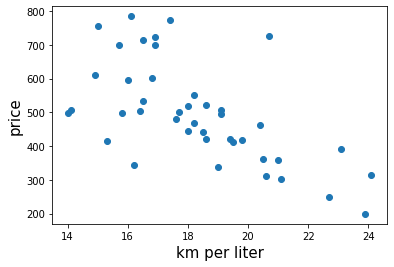

In [8]:
import matplotlib.pyplot as plt


plt.scatter(X, Y)
plt.xlabel('km per liter', fontsize = 15)
plt.ylabel('price', fontsize = 15)
plt.show()

In [15]:
cov = ((X - X.mean()) * (Y - Y.mean())).sum()
denominator = ((X - X.mean()) ** 2).sum()

m = cov / denominator
c = Y.mean() - m * X.mean()
m, c

(-36.126192362541595, 1157.8167408379927)

In [16]:
x = np.arange(X.min(), X.max() + 10)
print(x)
y_hat = m * x + c

[14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31.
 32. 33. 34.]


In [17]:
y_hat = m * X + c
r_square = ((y_hat - Y.mean()) ** 2).sum() / ((Y - Y.mean()) ** 2).sum()
r_square # a good model should near to 1


0.38489414085643947

In [18]:
dE_dm = ((Y - y_hat) * X).sum() * (-2 / X.shape[0])
dE_dc = ((Y - y_hat)).sum() * (-2 / X.shape[0])
dE_dm, dE_dc


(3.594669535578716e-12, 1.8947806286936003e-13)

In [19]:
learning_rate = 1e-5

m = m - (learning_rate * dE_dm)
c = c - (learning_rate * dE_dc)
m, c

(-36.126192362541595, 1157.8167408379927)

In [0]:
learning_rate = 1e-3

m, c = 0, Y.max()
x = np.arange(X.min(), X.max())

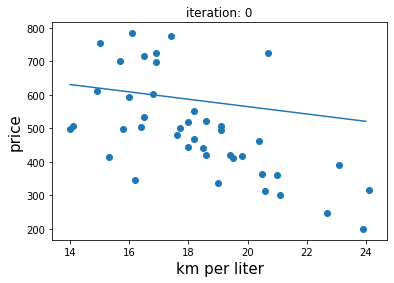

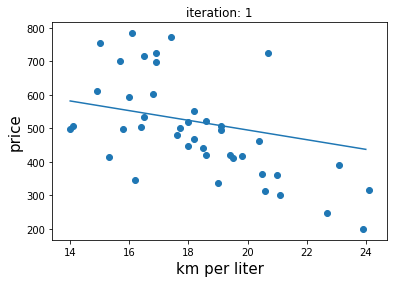

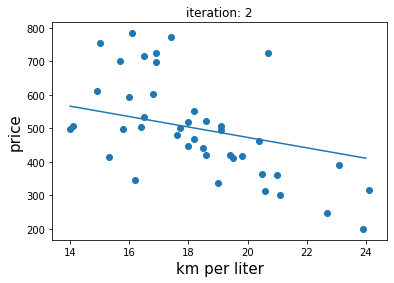

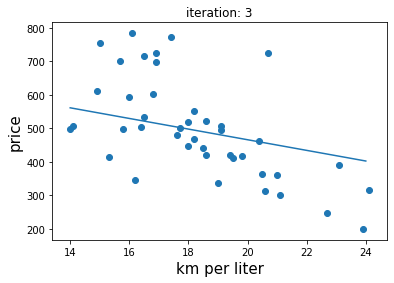

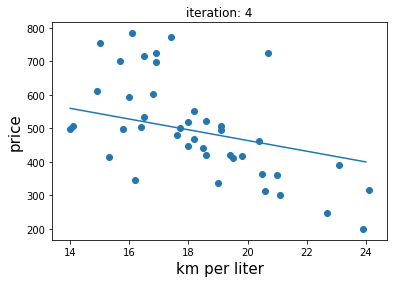

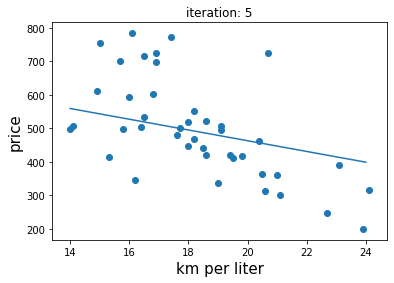

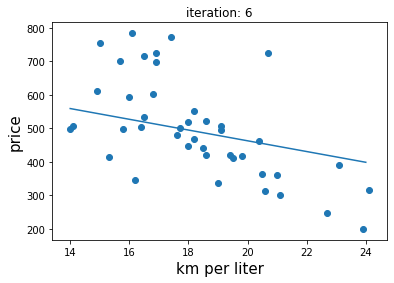

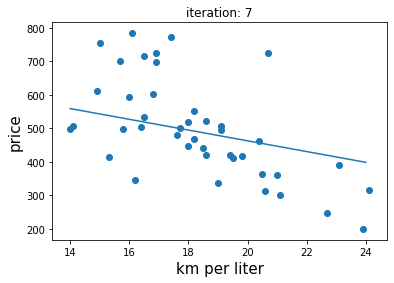

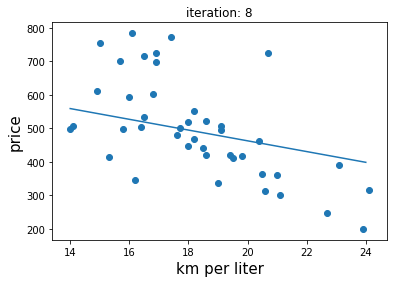

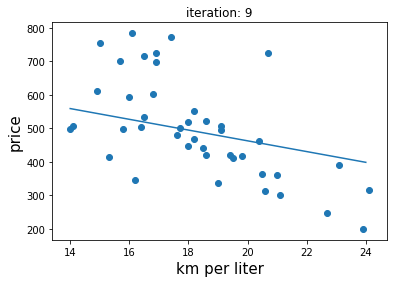

In [21]:
for i in range(10):
  y_hat = m * X + c
  dE_dm = ((Y - y_hat) * X).sum() * (-2 / X.shape[0])
  dE_dc = ((Y - y_hat)).sum() * (-2 / X.shape[0])
  m = m - (learning_rate * dE_dm)
  c = c - (learning_rate * dE_dc)
  y_hat = m * x + c

  plt.plot(x, y_hat)
  plt.scatter(X, Y)
  plt.xlabel('km per liter', fontsize = 15)
  plt.ylabel('price', fontsize = 15)
  plt.title('iteration: %d'%(i))
  plt.show()